<a href="https://colab.research.google.com/github/makenzieearle/Modeling-Probability-of-the-Schrodinger-Equation/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-492628667.py:41: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  psi = spsolve(A, B @ psi)


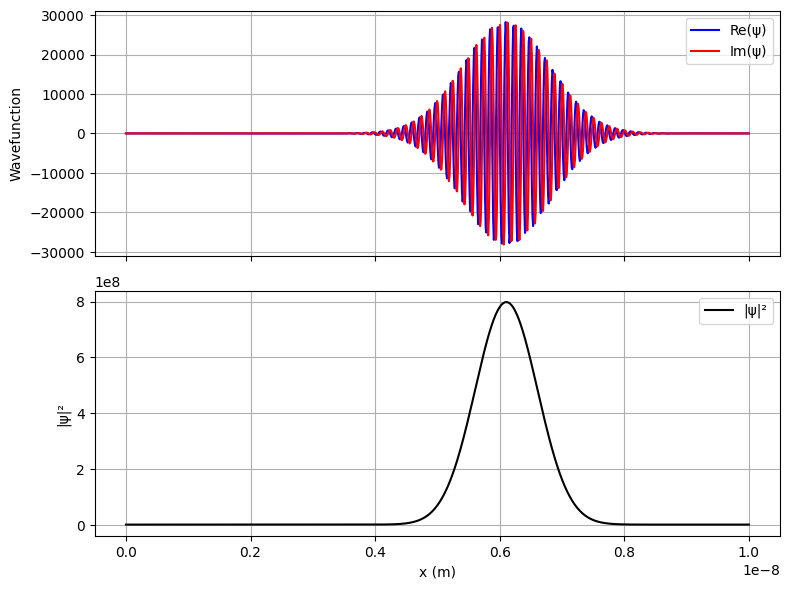

       Time (s)           ⟨x⟩           ⟨p⟩  Normalization
0  0.000000e+00  5.005533e-09  5.278137e-24            1.0
1  1.000000e-18  5.011065e-09  5.278137e-24            1.0
2  2.000000e-18  5.016598e-09  5.278137e-24            1.0
3  3.000000e-18  5.022130e-09  5.278137e-24            1.0
4  4.000000e-18  5.027663e-09  5.278137e-24            1.0
5  5.000000e-18  5.033195e-09  5.278137e-24            1.0
6  6.000000e-18  5.038728e-09  5.278137e-24            1.0
7  7.000000e-18  5.044261e-09  5.278137e-24            1.0
8  8.000000e-18  5.049793e-09  5.278137e-24            1.0
9  9.000000e-18  5.055326e-09  5.278137e-24            1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

hbar = 1.054571817e-34
m = 9.10938356e-31
L = 1e-8
N = 1000
a = L / N
dt = 1e-18
steps = 200
x = np.linspace(0, L, N)
x0 = L / 2
sigma = L / 20
k = 5e10

psi = np.exp(-(x - x0) ** 2 / (4 * sigma ** 2)) * np.exp(1j * k * x)
psi /= np.sqrt(np.sum(np.abs(psi) ** 2) * a)
psi[0] = 0
psi[-1] = 0

main_diag = -2.0 * np.ones(N)
off_diag = np.ones(N - 1)
T = diags([off_diag, main_diag, off_diag], [-1, 0, 1])
laplacian = T / a**2
V = np.zeros(N)
H = -(hbar**2 / (2 * m)) * laplacian + diags(V, 0)
I = diags([np.ones(N)], [0])

A = I + 1j * dt / (2 * hbar) * H
B = I - 1j * dt / (2 * hbar) * H

time_list = []
expect_x = []
expect_p = []
norm_list = []

for step in range(steps):
    psi = spsolve(A, B @ psi)
    psi[0] = 0
    psi[-1] = 0
    norm = np.sum(np.abs(psi) ** 2) * a
    psi /= np.sqrt(norm)

    prob_density = np.abs(psi) ** 2
    exp_x = np.sum(x * prob_density) * a
    psi_k = np.fft.fft(psi)
    k_vals = 2 * np.pi * np.fft.fftfreq(N, d=a)
    exp_p = hbar * np.sum(k_vals * np.abs(psi_k)**2) / np.sum(np.abs(psi_k)**2)

    time_list.append(step * dt)
    expect_x.append(exp_x)
    expect_p.append(exp_p)
    norm_list.append(np.sum(np.abs(psi) ** 2) * a)


df = pd.DataFrame({
    "Time (s)": time_list,
    "⟨x⟩": expect_x,
    "⟨p⟩": expect_p,
    "Normalization": norm_list
})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax1.plot(x, psi.real, 'b', label='Re(ψ)')
ax1.plot(x, psi.imag, 'r', label='Im(ψ)')
ax1.set_ylabel("Wavefunction")
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(psi)**2, 'k', label='|ψ|²')
ax2.set_ylabel("|ψ|²")
ax2.set_xlabel("x (m)")
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

print(df.head(10))


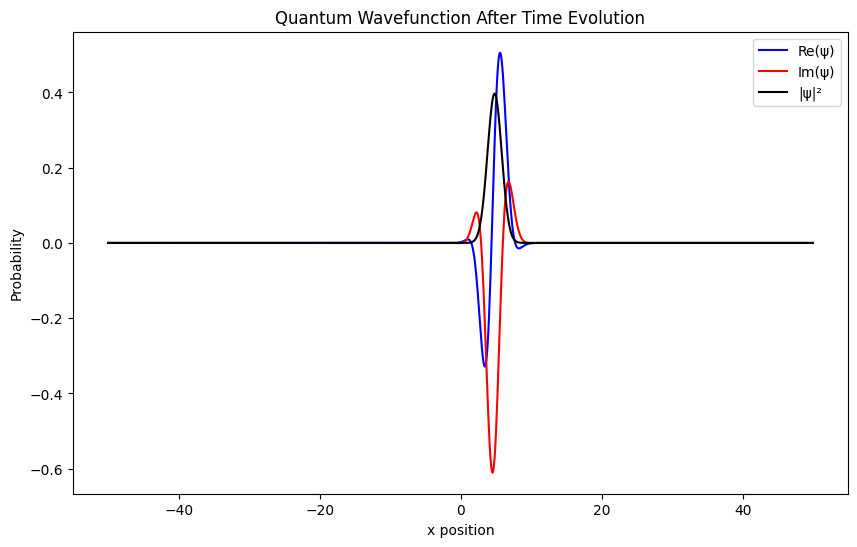

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Initial values
N = 1000
dx = 0.1
dt = 0.001
steps = 200
x = np.arange(-N//2, N//2) * dx
psi = np.exp(-(x-5)**2/4) * np.exp(1j*x)
psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)

#Potential barrier
V = np.zeros(N)
V[400:600] = 1.0

#Evolution function
def evolve(psi):
    d2psi = (np.roll(psi, -1) - 2*psi + np.roll(psi, 1)) / dx**2
    return psi + 1j * dt * (-0.5 * d2psi + V * psi)

for _ in range(steps):
    psi = evolve(psi)
    psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)

plt.figure(figsize=(10,6))
plt.plot(x, psi.real, 'b-', label='Re(ψ)')
plt.plot(x, psi.imag, 'r-', label='Im(ψ)')
plt.plot(x, np.abs(psi)**2, 'k-', label='|ψ|²')
plt.title("Quantum Wavefunction After Time Evolution")
plt.xlabel("x position")
plt.ylabel("Probability")
plt.legend()
plt.show()

/tmp/ipython-input-4124360233.py:31: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  psi = spsolve(A, B @ psi)


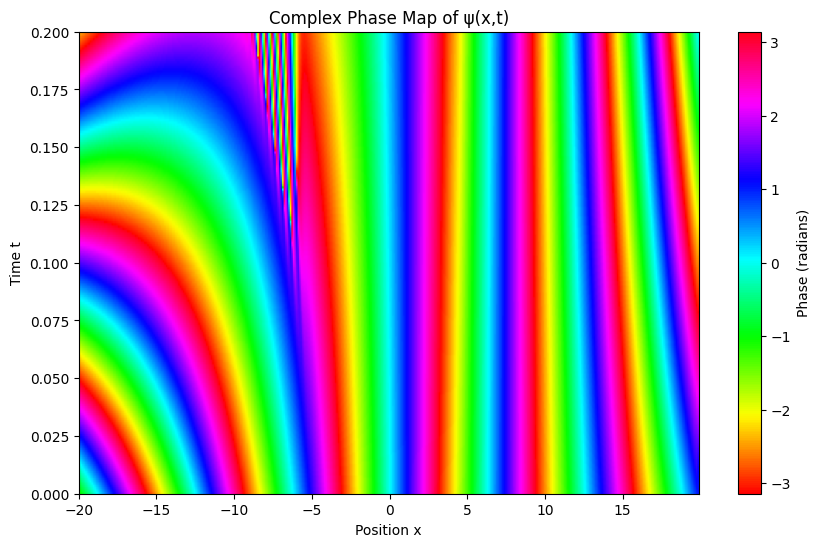

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

N = 400
dx = 0.1
dt = 0.001
steps = 200
x = np.arange(-N//2, N//2) * dx

psi = np.exp(-(x-5)**2/4) * np.exp(1j*x)
psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)
V = np.zeros(N)
V[150:250] = 1.0

#CN matrix
main = -2*np.ones(N)
off = np.ones(N-1)
lap = diags([off, main, off], [-1,0,1]) / dx**2
H = -0.5*lap + diags(V, 0)
I = diags([np.ones(N)], [0])
A = I + 1j*dt/2*H
B = I - 1j*dt/2*H

phase_data = []
for _ in range(steps):
    psi = spsolve(A, B @ psi)
    psi /= np.sqrt(np.sum(np.abs(psi)**2)*dx)
    phase_data.append(np.angle(psi))  # store phase

phase_data = np.array(phase_data)

# Plot
plt.figure(figsize=(10,6))
plt.imshow(phase_data, cmap='hsv', extent=[x[0], x[-1], 0, steps*dt], aspect='auto', origin='lower')
plt.colorbar(label='Phase (radians)')
plt.title("Complex Phase Map of ψ(x,t)")
plt.xlabel("Position x")
plt.ylabel("Time t")
plt.show()

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).



Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  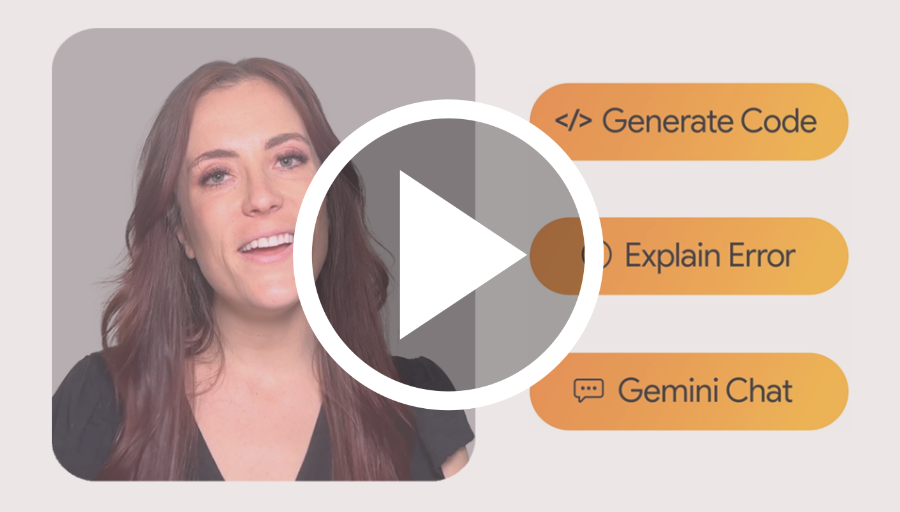
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

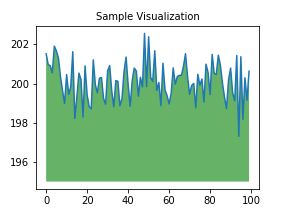

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

# New Section

<ipython-input-2-1269751481>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


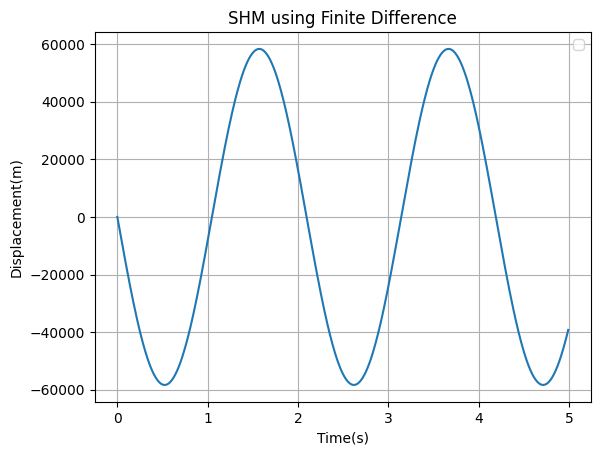

In [ ]:
import math
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

w= 3.0
dt=0.01
t_max=5
step= int(t_max/dt)
t=[]
x=[]

for i in range(step):
  t.append(0.0)
for i in range(step):
  x.append(0.0)
x0=1.0
v0=1.0
x[0]=x0
x[1]=x0+v0*step -0.5*w**2*v0*step
for i in range(step):
  t[i]=i*dt
i=1
while i< step-1:
  x[i+1]=2*x[i]-x[i-1] -w**2*x[i]*dt**2
  i+=1

plt.plot(t,x)
plt.xlabel("Time(s)")
plt.ylabel("Displacement(m)")
plt.title("SHM using Finite Difference")
plt.grid(True)
plt.legend()
plt.show()


print("Twinkle Twinkle Little Star, \n\tHow I wonder what you are!")



In [ ]:
print("Twinkle Twinkle Little Star, \n\tHow I wonder what you are!")


Twinkle Twinkle Little Star, 
	How I wonder what you are!


# New Section

In [ ]:
y=0
w=5.0
k=3.0
m=2.0
a=9.8
t=1.0
def f(x):
    return m*a

dt= dx = dy= 1e-6
dv_dt = df_dy= (f(y + dy) - f(y - dy)) / (2 * dy)
a=dv_dt
diff dv_dt = d2x_dt2= (x(t+dt)-(2*x(t))+x(t-dt))/ dt**2


d2x_dt2= (x(t+dt)-(2*x(t))+x(t-dt))/ dt**2

def x(t):
    return d2x_dt2*(1/-w**2)

lhs = m* d2x_dt2
rhs = -k* x(t)

lhs2= d2x_dt2
rhs2=(-k/m) * x(t)

lhs3= d2x_dt2
rhs3= -w**2 * x(t)
print(f"Derivative of f(x) at x = {y} is approximately: {df_dy}")
print(f"LHS: {lhs}")
print(f"\nRHS: {rhs}")
print(f"\nLHS: {lhs2}")
print(f"\nRHS: {rhs2}")
print(f"\nLHS: {lhs3}")
print(f"\nRHS: {rhs3}")

SyntaxError: invalid syntax (ipython-input-3945855534.py, line 13)